<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

## 1. Data Preprocessing

- Import Required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- Import csv file into a pandas DataFrame.
- As many of the columns contains 'Unspecified' value, hence replace them with NaN.

In [2]:
dataset = pd.read_csv("/home/ikraj/Documents/Simplilearn/Data Science with Python/Projects/Projects for Submission/Project3_NYC311/dataset/data_nyc311.csv",
                     low_memory=False)

dataset.replace('Unspecified',np.NaN,inplace=True)

- As visible below, many columns contains a lot of null Values.
- Current Size of DatFrame is around 150 MB.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null object
Closed Date                       362177 non-null object
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type                      36

- Make a list of columns which contains null values or irrlevate data.
- Its safe to drop these columns.
- We will retain 'Agency' column, hence 'Agency Name' will be dropped as both have similar values.
- Facility Type has only 'Precinct' value, hence not relevant.
- Column 'Due Date' and 'Resolution Action Updated Date' are not relevant to the analysis.

In [4]:
remove_columns= ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

- Drop above defined columns.
- As most of the requests are 'Closed', hence our analysis will include only 'Closed' requests and we will drop other records.
- Then we will drop the 'Status' column.
- Selecting not null values of 'Latitude', 'Longitude' and 'Descriptor' column values will furthere remove empty values.

In [5]:
dataset.drop(remove_columns, inplace=True, axis=1)
dataset = dataset[dataset['Status']=='Closed']
dataset.drop(['Status'],inplace=True, axis=1)
dataset = dataset[(dataset['Latitude'].notnull())& (dataset['Longitude'].notnull()) & (dataset['Descriptor'].notnull())]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353988 entries, 0 to 364557
Data columns (total 13 columns):
Unique Key                353988 non-null int64
Created Date              353988 non-null object
Closed Date               353988 non-null object
Agency                    353988 non-null object
Complaint Type            353988 non-null object
Descriptor                353988 non-null object
Location Type             353933 non-null object
Incident Zip              353948 non-null float64
City                      353948 non-null object
Resolution Description    353988 non-null object
Borough                   353987 non-null object
Latitude                  353988 non-null float64
Longitude                 353988 non-null float64
dtypes: float64(3), int64(1), object(9)
memory usage: 37.8+ MB


In [6]:
# Display DataFrame

dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170


- City Names are mixed as some names are lowercase and some UpperCase.
- We will convert all city names to Camel case using below defined function.

In [7]:
# fix city names

def camel_case(city):
    try:
        city = city.split(' ')
        city = ' '.join([x.lower().capitalize() for x in city])
        if city == 'Unknown':
            return np.nan
        else:
            return city
    except:
        return np.nan
    
# Apply camel_case function to City column
dataset['City'] = dataset['City'].apply(camel_case)
dataset['City'].value_counts()

Brooklyn               117291
New York                72852
Bronx                   48647
Staten Island           15194
Astoria                  8815
Jamaica                  8772
Flushing                 7434
Ridgewood                6348
Corona                   5347
Woodside                 4467
East Elmhurst            3578
Ozone Park               3424
South Richmond Hill      3414
Elmhurst                 3387
Long Island City         3170
Maspeth                  3100
Woodhaven                3086
South Ozone Park         2659
Fresh Meadows            2439
Richmond Hill            2294
Middle Village           2284
Queens Village           2221
Jackson Heights          2087
Forest Hills             2087
Rego Park                1798
Bayside                  1544
College Point            1541
Far Rockaway             1379
Whitestone               1362
Hollis                   1220
Howard Beach             1134
Rosedale                 1081
Springfield Gardens      1080
Saint Alba

- In the preprocessing we have dropped around 2.8 % of the records. 
- Below count shows that we have a very small number of empty values remaining.

In [8]:
dataset.count()

Unique Key                353988
Created Date              353988
Closed Date               353988
Agency                    353988
Complaint Type            353988
Descriptor                353988
Location Type             353933
Incident Zip              353948
City                      353948
Resolution Description    353988
Borough                   353987
Latitude                  353988
Longitude                 353988
dtype: int64

In [9]:
dataset.nunique()

Unique Key                353988
Created Date              351577
Closed Date               332522
Agency                         1
Complaint Type                15
Descriptor                    41
Location Type                 14
Incident Zip                 200
City                          48
Resolution Description        12
Borough                        5
Latitude                  144531
Longitude                 144292
dtype: int64

- Above count shows that a lot of columns have same or very few deifferent records, hence we will convert them to Categorical data.
- Date Values will be converted to DateTime objects.
- Date values should not be converted to categories.
- We will also make sure that Column 'Created Date' and 'Closed Date' do not have any null values remaining.
- We will create a new TimeDelta Columns as 'Request_Closing_Time' which will be the difference of 'Closed Date' and 'Created Date'.

In [10]:
exclude_columns = ['Created Date','Closed Date']

for col in exclude_columns:
    dataset[col] = pd.to_datetime(dataset[col],format='%m/%d/%Y %I:%M:%S %p')
    
for col in dataset.columns:
    if dataset[col].nunique() < 300 and col not in exclude_columns:
        dataset[col] = dataset[col].astype('category')
        

dataset.dropna(subset=['Created Date','Closed Date','City'], inplace=True)
dataset['Request_Closing_Time'] = dataset['Closed Date'] - dataset['Created Date']

- Our DataFrame size has been reduced from 150 MB to 20 MB now.
- Objects have been converted to Categories and DateTime as per requirement.

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353948 entries, 0 to 364557
Data columns (total 14 columns):
Unique Key                353948 non-null int64
Created Date              353948 non-null datetime64[ns]
Closed Date               353948 non-null datetime64[ns]
Agency                    353948 non-null category
Complaint Type            353948 non-null category
Descriptor                353948 non-null category
Location Type             353893 non-null category
Incident Zip              353946 non-null category
City                      353948 non-null category
Resolution Description    353948 non-null category
Borough                   353947 non-null category
Latitude                  353948 non-null float64
Longitude                 353948 non-null float64
Request_Closing_Time      353948 non-null timedelta64[ns]
dtypes: category(8), datetime64[ns](2), float64(2), int64(1), timedelta64[ns](1)
memory usage: 22.0 MB


## 2. Data Analysis and Visualization

- Below count shows that we only have NYPD requests available in our DataFrame.

In [12]:
dataset['Agency'].value_counts()

NYPD    353948
Name: Agency, dtype: int64

- As shown below, we have the data for entire 2015 year.

In [13]:
print('Start from : ',min(dataset['Created Date']))
print('Till : ',max(dataset['Created Date']))

Start from :  2015-01-01 00:00:50
Till :  2015-12-31 23:59:45


- Lets plot the number of complaints type received throughout 2015
- As shown below, highest number of complaints are of 'Blocked Driveway' type, followed by 'Illegal Parking' and 'Noise - Street/Sidewalk'.

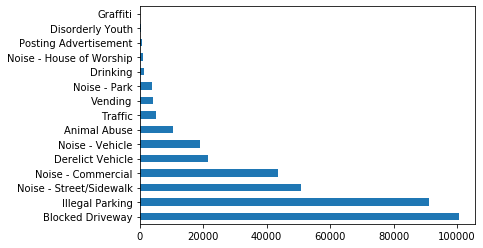

In [14]:
dataset['Complaint Type'].value_counts().plot('barh')

- When we plot the complaints by 'Descriptor', it varifies our previous point.
- 'Blocked Driveway' has highest of 'No Access' complaints followed by 'Posted Parking Sign Violation' and 'Partial Access'.
    (No regards for Parking rules. )
- With respect to noise related complaints, 'Loud Music/Party' has the highest complaints, followed by 'Loud Talking'.
    (How loud were they talking ?)

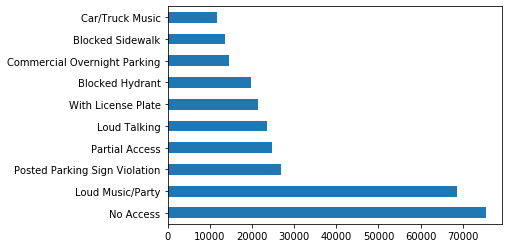

In [15]:
dataset['Descriptor'].value_counts()[:10].plot('barh')

- Lets now plot top 6 of the highest complaint types with respect to Boroughs.

In [16]:
top6_complaints = ['Blocked Driveway','Illegal Parking','Noise - Commercial','Noise - Street/Sidewalk','Derelict Vehicle','Animal Abuse']
comp_borough = dataset.groupby(['Borough','Complaint Type']).size().unstack()
comp_borough = comp_borough[top6_complaints]
comp_borough

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Commercial,Noise - Street/Sidewalk,Derelict Vehicle,Animal Abuse
Borough,,,,,,
BRONX,17049,9854,2941,9116,2399,1967
BROOKLYN,36423,33454,13848,13943,6246,3185
MANHATTAN,2687,14372,18668,22186,687,1926
QUEENS,41472,27174,7387,4663,9911,2637
STATEN ISLAND,2844,6220,783,884,2181,786


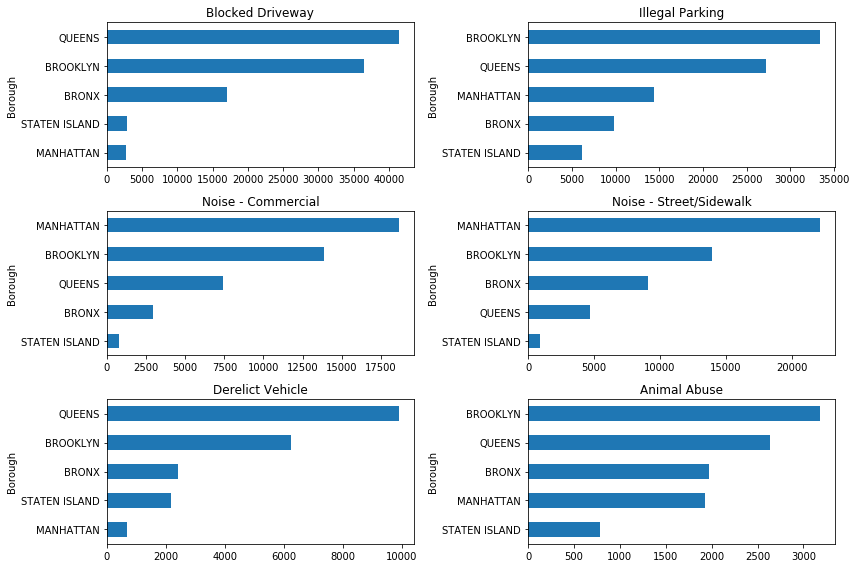

In [17]:
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label,col) in enumerate(comp_borough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

- Clearly Manhattan is making most of the noise, followed by Brooklyn.
- Brooklyn has the most number of 'Illegal parking' complaints and is also on the top for 'Animal Abuse'. (Savages!)
- Queens has highest complaints for 'Blocked Driveway' as well as for 'Derelict Vehicle'.

- Lets now breakdown the complaints for each Borough

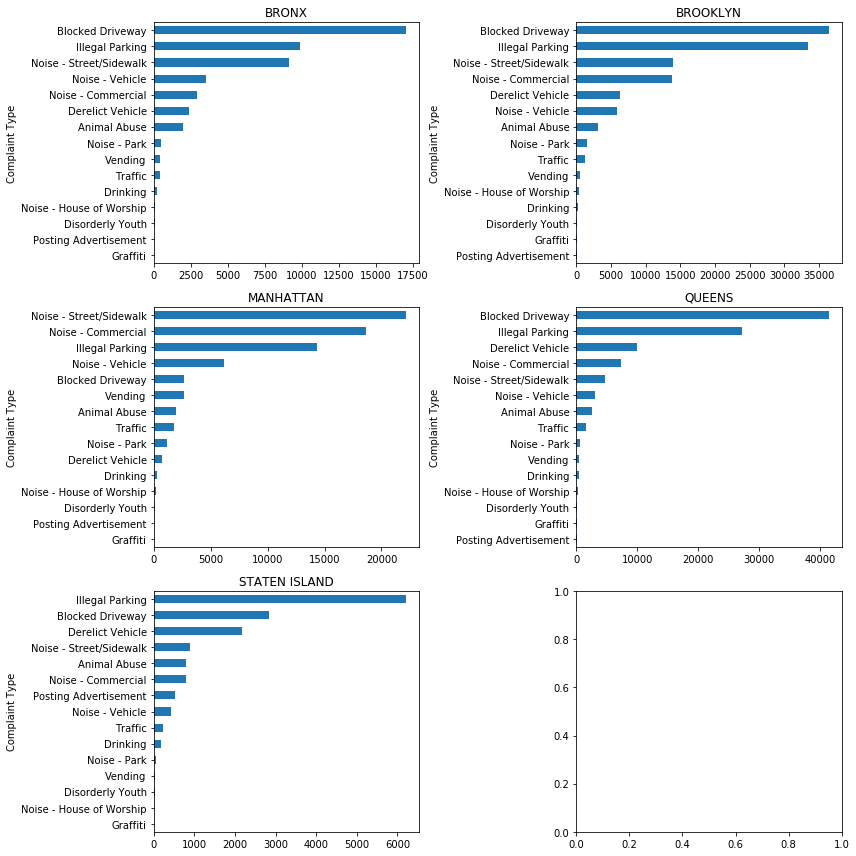

In [18]:
# Visualization of most Complaints per Borough
borough_comp = dataset.groupby(['Complaint Type','Borough']).size().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

- Apart from Manhattan, number of Complaints for 'Blocked Driveway' and 'Illegal Parking' is highest for each Borough.
- Manhattan has highest number of Noise complaints. Fortunaltely, parking in Manhattan is better than other Boroughs.

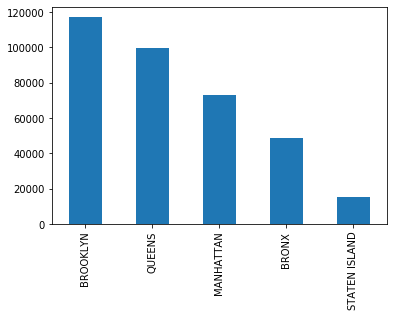

In [19]:
dataset['Borough'].value_counts().plot('bar')

- Borough wise, Brooklyn has the most number of Complaints followed by Queens and Manhattan.

- Lets plot a treemap of top 10 cities for highest number of complaints.

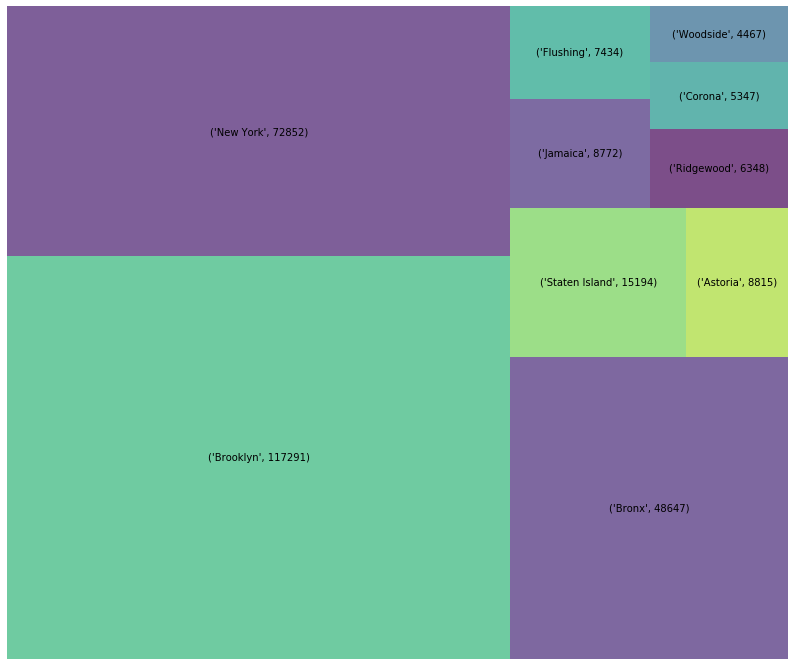

In [20]:
citywise_complaints = pd.DataFrame(dataset['City'].value_counts()[:10])

import squarify
fig = plt.gcf()
fig.set_size_inches(14, 12)
label=zip(list(citywise_complaints.index),citywise_complaints['City'])
squarify.plot(sizes=citywise_complaints['City'], label=label, alpha=0.7)
plt.axis('off')
plt.show()

- Clearly Brooklyn in the winner here raising 1/3 of overall complaints .
- Followed by New York and Bronx.

- Lets now move towrds the resolution of these complaints.

In [21]:
dataset['Request_Closing_Time'].describe()

count                    353948
mean     0 days 04:11:23.448822
std      0 days 05:50:00.513826
min             0 days 00:01:01
25%             0 days 01:15:31
50%             0 days 02:40:05
75%             0 days 05:13:55
max            24 days 16:52:22
Name: Request_Closing_Time, dtype: object

- First we will convert our Request_Closing_Time from days to number of hours.
- Since, converting 2:30 hours to timedelta64[h] will give 2 hours, hence we will add 1 and will say that this particular request was closed within 3 hours.
- Then we will find out the mean and standard distribution of the data.

In [22]:
dataset['Request_Closing_Hours'] = dataset['Request_Closing_Time'].astype('timedelta64[h]')+1
dataset[['Request_Closing_Time','Request_Closing_Hours']].head()

,Request_Closing_Time,Request_Closing_Hours
0,00:55:30,1.0
1,01:27:13,2.0
2,04:51:34,5.0
3,07:45:27,8.0
4,03:27:44,4.0


In [23]:
mean = dataset['Request_Closing_Hours'].mean()
std = dataset['Request_Closing_Hours'].std()

print('Mean: ',mean)
print('Std: ',std)

Mean:  4.696672957609592
Std:  5.835441340980358


In [24]:
dataset['Request_Closing_Hours'].sort_values().tail()

12167     224.0
21268     520.0
23664     578.0
339204    588.0
244488    593.0
Name: Request_Closing_Hours, dtype: float64

- As we can see, some of the closing times are too high and hence will be dealt as outliers.
- We will convert the Request Closing time to normal z statistics and will remove any record having value more than 1.
- z-statistic  = (value-mean)/std
- Next we will plot the histogram of our Request_Closing_Time.

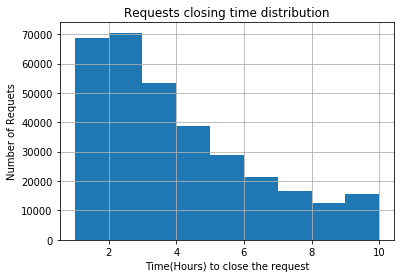

In [25]:
plot_data = dataset[ ((dataset['Request_Closing_Hours']-mean)/std) < 1]
plot_data['Request_Closing_Hours'].hist(bins=9)
plt.xlabel('Time(Hours) to close the request')
plt.ylabel('Number of Requets')
plt.title('Requests closing time distribution')
plt.show()

- Above distribution shows that around half of overall complaints were closed within 2 to 4 hours.
- Around 99% of the complaints were closed within 10 hours.

- Lets look at the closing complaint performance Boroughwise

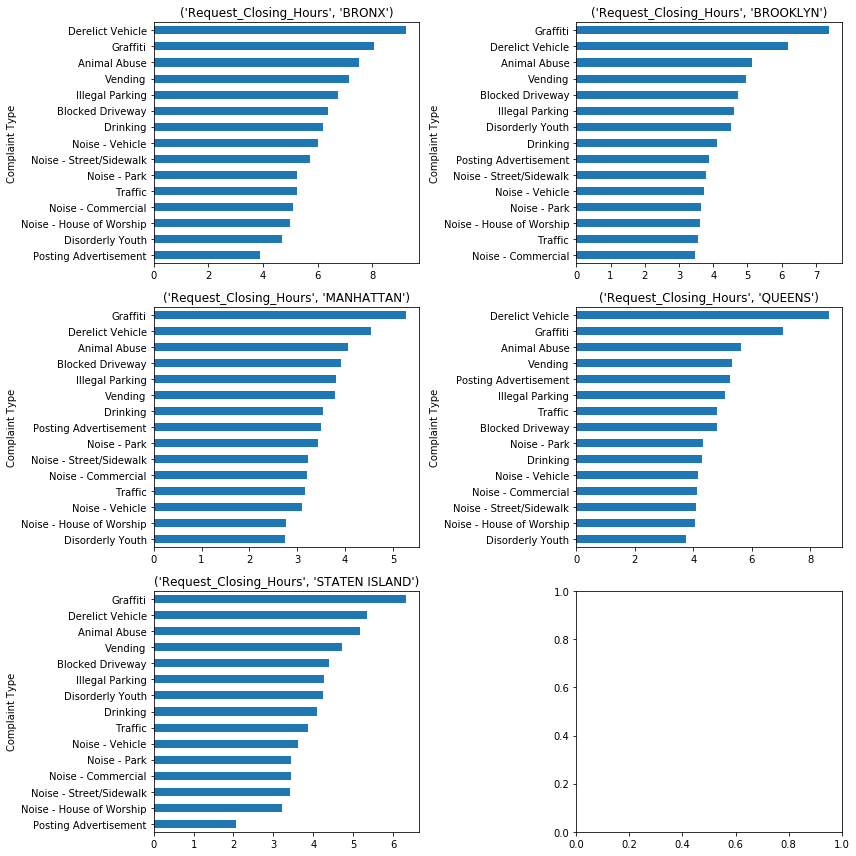

In [26]:
citywise_resolution = dataset.groupby(['Complaint Type','Borough'])[['Request_Closing_Hours']].mean().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(citywise_resolution.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

- Clealry 'Graffiti' complaints are taking a long time to be closed. Could be because the number of Graffiti complaints are very less and officials are focused on more pressing issues.
- Manhattan, Bronx and Queens are handling 'Disorderly Youth' complaints very well.
- Brooklyn is performing well to close Noise and traffic complaints.

 - Lets now do a month wise analysis of complaints.

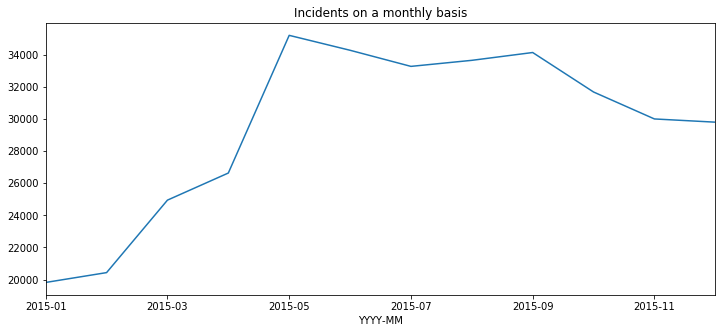

In [27]:
import datetime
dataset['YYYY-MM'] = dataset['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

#Incidents on a monthly basis
monthly_incidents =  dataset.groupby('YYYY-MM').size().plot(figsize=(12,5), title='Incidents on a monthly basis');

- January and Februray have the least number of complaints.( Holidays or Winter ? )
- May and September has the highest number of complaints. ( Summer parties ?)

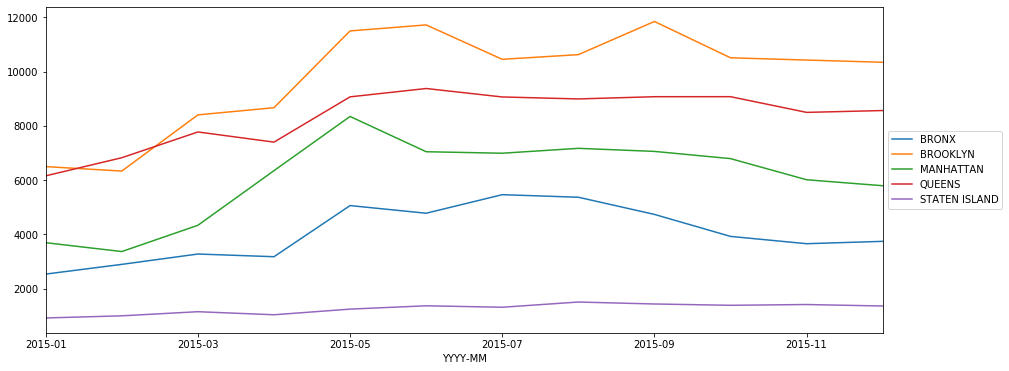

In [28]:
# Complaints per Borough through the year
dataset.groupby(['YYYY-MM','Borough']).size().unstack().plot(figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

- Brooklyn raise highest number of complaints in May and September and least comlaints in February.

- As for the Request Closing time

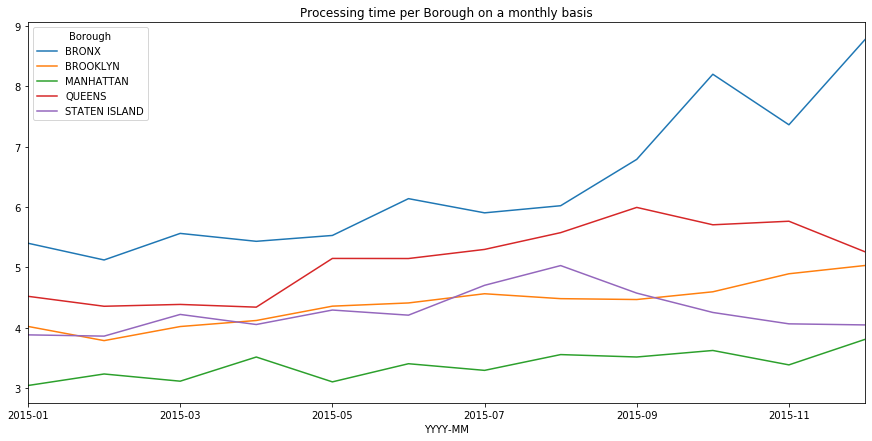

In [29]:
dataset.groupby(['YYYY-MM','Borough'])['Request_Closing_Hours'].mean().unstack().plot(figsize=(15,7),
                                                                        title='Processing time per Borough on a monthly basis');

- Manhattan has the best average closing time throughout the year.
- Shockingly Bronx has the highest closing time. It also has the leasts number of complaints after Staten island.
- Staten island's closing time is better than Bronx.

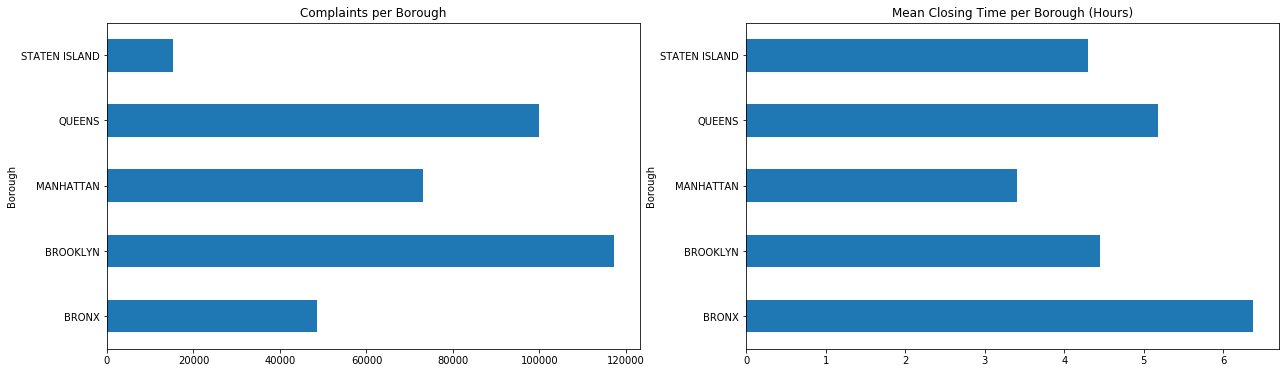

In [30]:
fig = plt.figure(figsize=(21,6))
plt.subplot(1, 2, 1)
dataset.groupby('Borough')['Unique Key'].size().plot(kind='barh',title='Complaints per Borough');

plt.subplot(1, 2, 2)
dataset.groupby('Borough')['Request_Closing_Hours'].mean().plot(kind='barh',title='Mean Closing Time per Borough (Hours)');
plt.show()

## Conclusion:

- Most complaints raised in May and September, while least in February.
- Highest number of complaints raised are of 'Blocked Driveway'.(28% of all the complaints)
- Second highest number of complaints are of Noice Complaints.(26% of all the complaints including both streetwalk and commercial complaints)
- Third highest number of complaints are of 'Illegal Parking'.(25% of all the complaints)

### Brooklyn:
- Raises the most number of complaints as of 33%.
- Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (60% of all complaints raised in Brooklyn)
- Around 30% of 'Animal Abuse' complaints are raised from Brooklyn alone.
- Complaints are closed in second best average closing time. (4.5 hours per complaint)

### Queens:
- Number of complaints are second highest at around 28%.
- As Brooklyn, Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (68% of all complaints raised in Queens)
- 40% of all 'Blocked Driveway' complaints are raised from Queens.
- 45% of all 'Derelict Vehicle' complaints are raised from Queens.
- Complaints are closed poorly, in average closing time of 5 hours.

### Manhattan:
- Number of complaints are around 20%.
- Mostly Noise related complaints. (55% including both streetwalk and commercial complaints)
- Complaints are closed in best closing time. (3.5 hours per complaint)

### Bronx:
- Number of Complaints around 13%.
- Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (55% of all complaints raised in Bronx)
- Complaints are closed in poorest closing time. (more than 6 hours per complaint)

### Staten Island:
- Lowest number of Complaints raised.(4%)
- Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (60% of all complaints raised in Staten Island)
- Complaints are closed in average closing time.(4.5 hours per complaint)

## 3. Hypothesis testing

### 1.  Whether the average response time across complaint types is similar or not (overall)

- First we will convert our hourly timedelta into minuted for more precise results.
- Below is the distribution of our Request_Closing_Minutes data for 'Noise - Street/Sidewalk' complaint type.
- We see a positive skewness in data if we limit the range to 1250
- As our data contains too many outliers , hence we will transform the data using log transformation

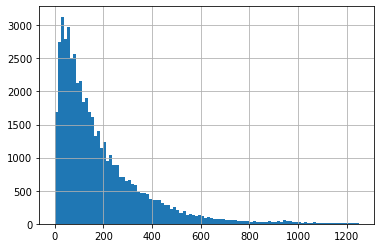

In [31]:
dataset['Request_Closing_Minutes'] = dataset['Request_Closing_Time'].astype('timedelta64[m]')+1

original = dataset[dataset['Complaint Type']=='Noise - Street/Sidewalk']['Request_Closing_Minutes']
original.hist(bins=100,range=(0,1250))

In [32]:
original.describe()

count    50792.000000
mean       204.163628
std        321.054318
min          3.000000
25%         59.000000
50%        130.000000
75%        255.000000
max      35573.000000
Name: Request_Closing_Minutes, dtype: float64

- When we look at above statistics, it becomes clear that we have very few but very large values after th 75th percentile.

- we will take the log of Request_Closing_Minutes for each complaint type and store in a dictionary.
- Log transformation removes the skewness from the data.

In [33]:
data = {}
for complaint in dataset['Complaint Type'].unique():
    data[complaint] = np.log(dataset[dataset['Complaint Type']==complaint]['Request_Closing_Minutes'])

In [34]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

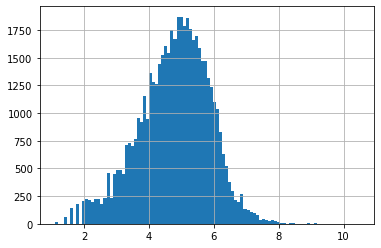

In [35]:
data['Noise - Street/Sidewalk'].hist(bins=100)

- Above distribution plot shows that once we apply log Transformation to our data, skewness is almost removed and it looks more like a normal distribution.

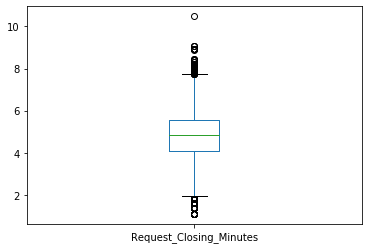

In [36]:
data['Noise - Street/Sidewalk'].plot('box')

In [37]:
for complaint in data.keys():
    print(data[complaint].std())

1.0929649947429587
0.9595435249476735
1.0661132742358668
1.2375207472749008
1.0794682378500253
1.159529659735018
1.204538970992148
1.0704302517292041
1.0305792879974494
1.104041973235205
1.1734686557696592
1.0413402424418237
1.1110771753787367
1.0044834528269917
1.024992278057816


-  To conduct our hypothesis test, we will conduct an ANOVA (analysis of variance) test as we have to compare the means of more than two groups.
- Below conditions should be met before conducting ANOVA.
    1. All distributions must follow a normal distributions curve. We have verified this after the log transformation
    2. Standard deviation for all groups must be same. Above output proves that this is true.
    3. All samples are drawn independently of each other.

In [38]:
[ complaint for complaint in data.keys() ]

['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Illegal Parking',
 'Derelict Vehicle',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Noise - Vehicle',
 'Animal Abuse',
 'Vending',
 'Traffic',
 'Drinking',
 'Noise - Park',
 'Graffiti',
 'Disorderly Youth']

Now we will futher move on to defining hypothesis and critical values........

**Null Hypothesis:** Average response time for all the complaints type is same.

**Alternate Hypothesis:** Average response time for all the complaints type is not same and theres is some difference among the groups.

- Below We conduct ANOVA test for top 5 type of complaints
- For a 95% of confidence interval we choose our alpha as 0.05 for 5%
- Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.

     **if p < alpha(0.05)** : Reject Null Hypothesis, Average response time for all the complaints type is not same.
     
     **if p > alpha(0.05)** : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.

In [39]:
# import f_oneway from scipy.stats library
from scipy.stats import f_oneway

stat, p = f_oneway(data['Noise - Street/Sidewalk'],data['Blocked Driveway'],data['Illegal Parking'],data['Derelict Vehicle'],
                   data['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2813.194, p=0.000
Different distributions (reject H0)


- As our p-value is quite low , hence it is being converted to 0.0
- Since our p-value is lowere that our critical p-value, we will conclude that we have enogh evidence to reject pur Null Hypothesis and that

     **Average response time for all the complaints type is not same.**

### 2. Are the type of complaint or service requested and location related?

- To find the correlation between location and complaint types, we will consider below columns
    1. Complaint Type
    2. Borough
    3. City
    4. Longitude
    5. Latitude
    

In [40]:
sample = dataset[['Complaint Type','Borough','Longitude','Latitude','City']]

- Since Our data in Complaint Type, Borough and City is Categorical hence we can not directly apply corr() method.
- First we will convert the categorical data to numerical data by mapping the category to category codes

In [41]:
sample['Complaint Type'] = sample['Complaint Type'].cat.codes
sample['Borough'] = sample['Borough'].cat.codes
sample['City'] = sample['City'].cat.codes

/home/ikraj/.local/share/virtualenvs/practice-xxv3eLJk/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ikraj/.local/share/virtualenvs/practice-xxv3eLJk/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ikraj/.local/share/virtualenvs/practice-xxv3eLJk/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [42]:
sample.head()

,Complaint Type,Borough,Longitude,Latitude,City
0,10,2,-73.923501,40.865682,29
1,1,3,-73.915094,40.775945,1
2,1,0,-73.888525,40.870325,5
3,6,0,-73.828379,40.835994,5
4,6,3,-73.874170,40.733060,12


In [43]:
sample.corr(method='pearson')

,Complaint Type,Borough,Longitude,Latitude,City
Complaint Type,1.000000,-0.066045,-0.186339,0.154466,0.094267
Borough,-0.066045,1.000000,0.021518,-0.250787,0.721985
Longitude,-0.186339,0.021518,1.000000,0.377712,-0.122176
Latitude,0.154466,-0.250787,0.377712,1.000000,-0.024213
City,0.094267,0.721985,-0.122176,-0.024213,1.000000


- As we can see from above table, **there is no relationship between complaint type and location.**
- Which will be the general idea as in our data, most of the Complaint type are of 'Blocked Driveway' and 'Illegal Parking' which is common in all of the Boroughs.